In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [146]:
df = pd.read_csv('nhl_players_df.csv')

In [147]:
df.drop("Unnamed: 0", axis=1, inplace = True)

In [148]:
df.head()

,Player,Link,Age,Tm,Pos,Games Played,Goals,Assists,Points,Plus/Minus,...,Blocks,Hits,Faceoff Wins,Faceoff Losses,Faceoff Percentage,Avg Shift Length,height,weight,birthPlace,shoots
0,Justin Abdelkader,/players/a/abdelju01.html,32.0,DET,LW,49.0,0,3,3.0,-14.0,...,26.0,103.0,38,31,55.1,44.0,74.0,213.0,"in Muskegon, Michigan",Left
1,Pontus Aberg,/players/a/abergpo01.html,26.0,TOR,LW,5.0,0,1,1.0,0.0,...,1.0,1.0,0,0,NaN,50.0,72.0,194.0,"in Stockholm, Sweden",Right
2,Vitaly Abramov,/players/a/abramvi01.html,21.0,OTT,RW,2.0,1,0,1.0,0.0,...,0.0,0.0,0,0,NaN,31.0,69.0,171.0,"in Chelyabinsk, Russian Federation",Left
3,Noel Acciari,/players/a/acciano01.html,28.0,FLA,C,66.0,20,7,27.0,2.0,...,103.0,121.0,381,414,47.9,51.0,70.0,209.0,"in Johnston, Rhode Island",Right
4,Andrew Agozzino,/players/a/agozzan01.html,29.0,ANA,LW,5.0,1,0,1.0,3.0,...,2.0,6.0,8,8,50.0,35.0,70.0,187.0,"in Kleinburg, Ontario",Left


In [149]:
df["Points per Game Played"] = df["Points"] / df["Games Played"]
df["Blocks per Game Played"] = df["Blocks"] / df["Games Played"]
df["Hits per Game Played"] = df["Hits"] / df["Games Played"]
df["Penalties (min) per Game Played"] = df["Penalties in Minutes"] / df["Games Played"]
df["Shots on Goal per Game Played"] = df["Shots"] / df["Games Played"]

In [150]:
df.head()

,Player,Link,Age,Tm,Pos,Games Played,Goals,Assists,Points,Plus/Minus,...,Avg Shift Length,height,weight,birthPlace,shoots,Points per Game Played,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played
0,Justin Abdelkader,/players/a/abdelju01.html,32.0,DET,LW,49.0,0,3,3.0,-14.0,...,44.0,74.0,213.0,"in Muskegon, Michigan",Left,0.061224,0.530612,2.102041,0.510204,0.816327
1,Pontus Aberg,/players/a/abergpo01.html,26.0,TOR,LW,5.0,0,1,1.0,0.0,...,50.0,72.0,194.0,"in Stockholm, Sweden",Right,0.200000,0.200000,0.200000,0.000000,0.800000
2,Vitaly Abramov,/players/a/abramvi01.html,21.0,OTT,RW,2.0,1,0,1.0,0.0,...,31.0,69.0,171.0,"in Chelyabinsk, Russian Federation",Left,0.500000,0.000000,0.000000,1.000000,1.500000
3,Noel Acciari,/players/a/acciano01.html,28.0,FLA,C,66.0,20,7,27.0,2.0,...,51.0,70.0,209.0,"in Johnston, Rhode Island",Right,0.409091,1.560606,1.833333,0.318182,1.636364
4,Andrew Agozzino,/players/a/agozzan01.html,29.0,ANA,LW,5.0,1,0,1.0,3.0,...,35.0,70.0,187.0,"in Kleinburg, Ontario",Left,0.200000,0.400000,1.200000,0.000000,0.400000


In [151]:
df.drop(["Goals","Assists","Plus/Minus","Point Shares","Game-Winning Goals","Short-Handed Goals","Even Strength Assists","Power Play Assists","Short-Handed Assists","Shooting Percentage","Even Strength Goals", "Power Play Goals","Faceoff Losses"],axis =1, inplace = True)

In [152]:
df.head()

,Player,Link,Age,Tm,Pos,Games Played,Points,Penalties in Minutes,Shots,Time on Ice,...,Avg Shift Length,height,weight,birthPlace,shoots,Points per Game Played,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played
0,Justin Abdelkader,/players/a/abdelju01.html,32.0,DET,LW,49.0,3.0,25.0,40.0,565.0,...,44.0,74.0,213.0,"in Muskegon, Michigan",Left,0.061224,0.530612,2.102041,0.510204,0.816327
1,Pontus Aberg,/players/a/abergpo01.html,26.0,TOR,LW,5.0,1.0,0.0,4.0,44.0,...,50.0,72.0,194.0,"in Stockholm, Sweden",Right,0.200000,0.200000,0.200000,0.000000,0.800000
2,Vitaly Abramov,/players/a/abramvi01.html,21.0,OTT,RW,2.0,1.0,2.0,3.0,12.0,...,31.0,69.0,171.0,"in Chelyabinsk, Russian Federation",Left,0.500000,0.000000,0.000000,1.000000,1.500000
3,Noel Acciari,/players/a/acciano01.html,28.0,FLA,C,66.0,27.0,21.0,108.0,1054.0,...,51.0,70.0,209.0,"in Johnston, Rhode Island",Right,0.409091,1.560606,1.833333,0.318182,1.636364
4,Andrew Agozzino,/players/a/agozzan01.html,29.0,ANA,LW,5.0,1.0,0.0,2.0,50.0,...,35.0,70.0,187.0,"in Kleinburg, Ontario",Left,0.200000,0.400000,1.200000,0.000000,0.400000


In [112]:
df.columns

Index(['Player', 'Link', 'Age', 'Tm', 'Pos', 'Games Played', 'Points',
       'Penalties in Minutes', 'Shots', 'Time on Ice', 'Average Time on Ice',
       'Blocks', 'Hits', 'Faceoff Wins', 'Faceoff Percentage',
       'Avg Shift Length', 'height', 'weight', 'birthPlace', 'shoots',
       'Points per Game Played', 'Blocks per Game Played',
       'Hits per Game Played', 'Penalties (min) per Game Played',
       'Shots on Goal per Game Played'],
      dtype='object')

In [153]:
df = df[df["Games Played"]!=0]
df = df[df["Points per Game Played"]!=0]

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1564
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Player                           1565 non-null   object 
 1   Link                             1565 non-null   object 
 2   Age                              1565 non-null   float64
 3   Tm                               1565 non-null   object 
 4   Pos                              1565 non-null   object 
 5   Games Played                     1565 non-null   float64
 6   Points                           1565 non-null   float64
 7   Penalties in Minutes             1565 non-null   float64
 8   Shots                            1565 non-null   float64
 9   Time on Ice                      1565 non-null   float64
 10  Average Time on Ice              1565 non-null   float64
 11  Blocks                           1565 non-null   float64
 12  Hits                

In [156]:
df_subset = df[["Age","height","Blocks per Game Played","Hits per Game Played","Penalties (min) per Game Played","Shots on Goal per Game Played","Avg Shift Length","Points per Game Played"]]
df_subset.corr()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Points per Game Played
Age,1.000000,0.021050,0.182630,0.062471,0.056536,0.051266,-0.030475,0.005133
height,0.021050,1.000000,0.194132,0.203933,0.162481,-0.055223,0.000648,-0.081939
Blocks per Game Played,0.182630,0.194132,1.000000,0.137938,0.065169,-0.053936,0.069733,-0.138793
Hits per Game Played,0.062471,0.203933,0.137938,1.000000,0.353496,-0.157692,-0.045216,-0.206797
Penalties (min) per Game Played,0.056536,0.162481,0.065169,0.353496,1.000000,0.008687,0.011219,0.046438
Shots on Goal per Game Played,0.051266,-0.055223,-0.053936,-0.157692,0.008687,1.000000,0.231981,0.728641
Avg Shift Length,-0.030475,0.000648,0.069733,-0.045216,0.011219,0.231981,1.000000,0.232727
Points per Game Played,0.005133,-0.081939,-0.138793,-0.206797,0.046438,0.728641,0.232727,1.000000


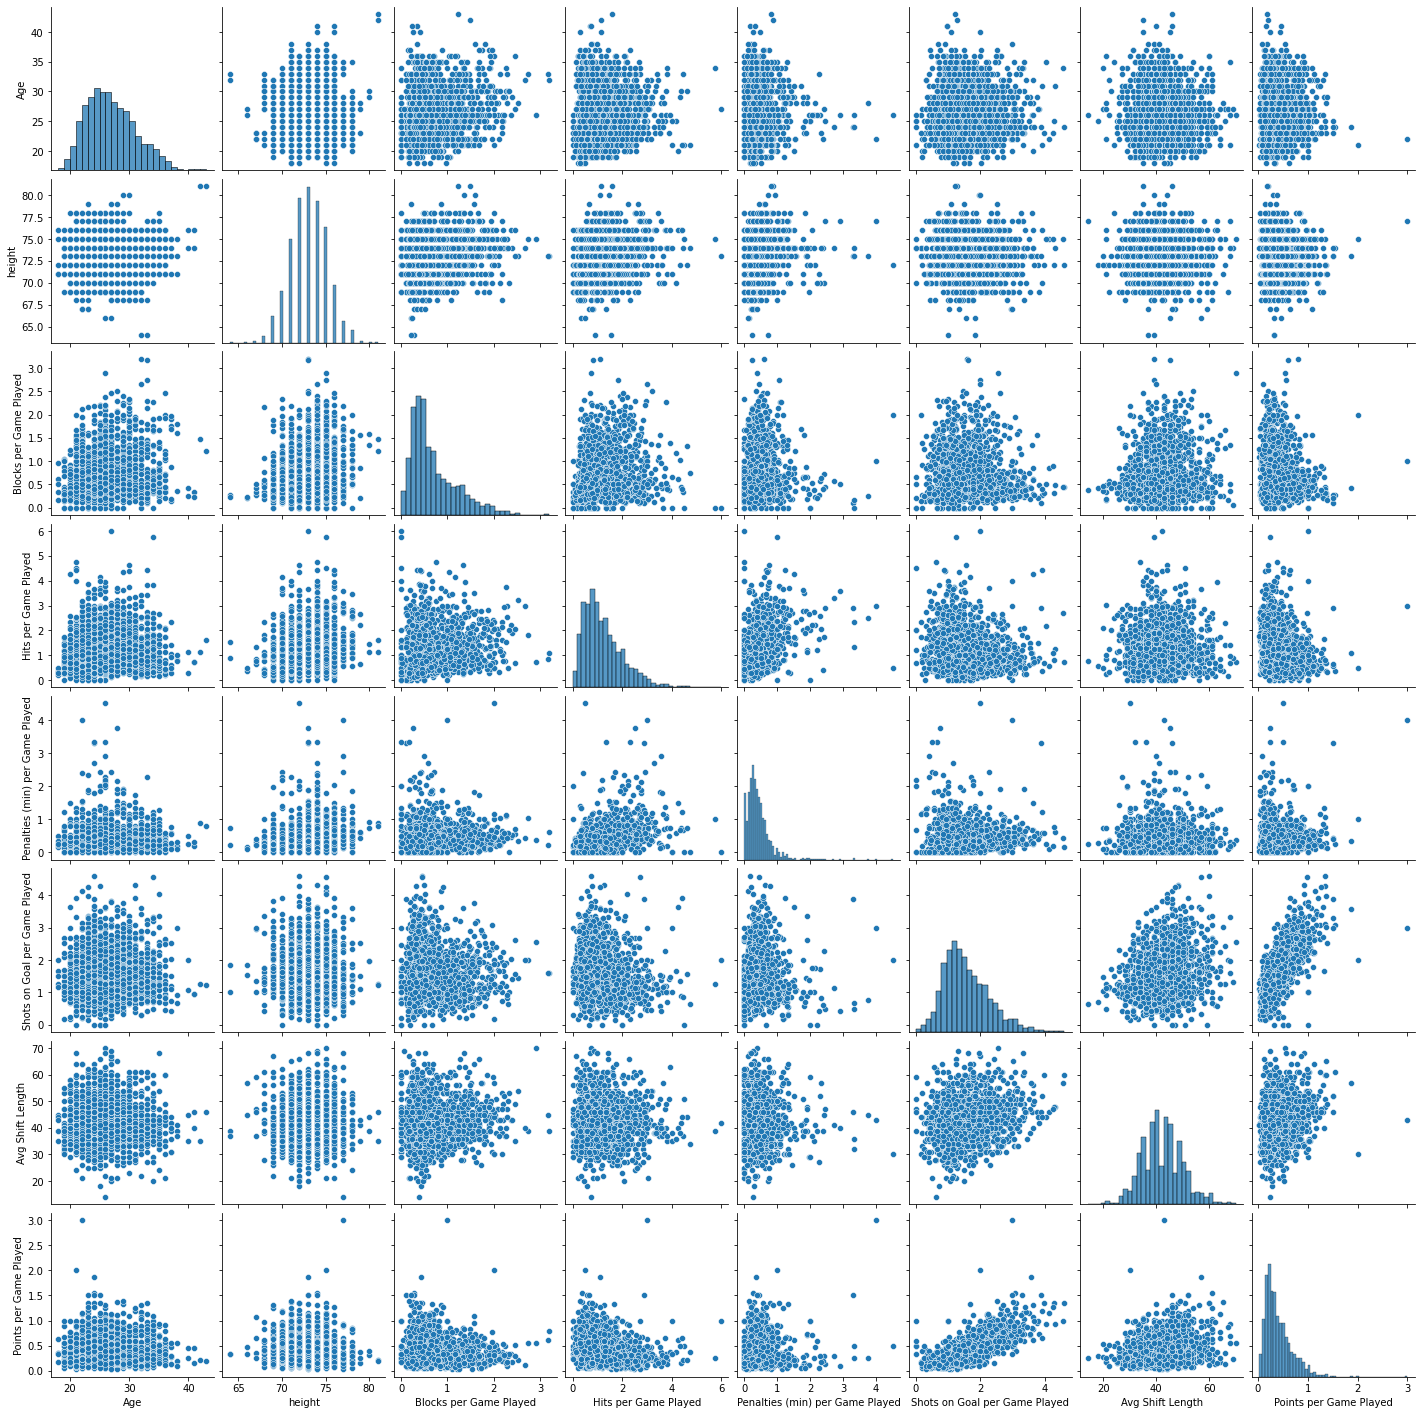

In [157]:
sns.pairplot(df_subset)

In [176]:
X, y = df_subset.drop("Points per Game Played", axis = 1), df_subset['Points per Game Played']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [177]:
lm = LinearRegression()
cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2')

array([0.59614786, 0.6279198 , 0.60139118, 0.52454612, 0.57233695])

In [178]:
def split_and_validate(X, y):
    
    X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    X, y = np.array(X), np.array(y)

    score = cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2')
    print('\nCrossValidation R^2 score was:', score, np.mean(score))

In [179]:
split_and_validate(X,y)


CrossValidation R^2 score was: [0.46588377 0.58023918 0.61019081 0.53936045 0.65576084] 0.5702870094020294


In [180]:
df.head()

,Player,Link,Age,Tm,Pos,Games Played,Points,Penalties in Minutes,Shots,Time on Ice,...,Avg Shift Length,height,weight,birthPlace,shoots,Points per Game Played,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played
0,Justin Abdelkader,/players/a/abdelju01.html,32.0,DET,LW,49.0,3.0,25.0,40.0,565.0,...,44.0,74.0,213.0,"in Muskegon, Michigan",Left,0.061224,0.530612,2.102041,0.510204,0.816327
1,Pontus Aberg,/players/a/abergpo01.html,26.0,TOR,LW,5.0,1.0,0.0,4.0,44.0,...,50.0,72.0,194.0,"in Stockholm, Sweden",Right,0.200000,0.200000,0.200000,0.000000,0.800000
2,Vitaly Abramov,/players/a/abramvi01.html,21.0,OTT,RW,2.0,1.0,2.0,3.0,12.0,...,31.0,69.0,171.0,"in Chelyabinsk, Russian Federation",Left,0.500000,0.000000,0.000000,1.000000,1.500000
3,Noel Acciari,/players/a/acciano01.html,28.0,FLA,C,66.0,27.0,21.0,108.0,1054.0,...,51.0,70.0,209.0,"in Johnston, Rhode Island",Right,0.409091,1.560606,1.833333,0.318182,1.636364
4,Andrew Agozzino,/players/a/agozzan01.html,29.0,ANA,LW,5.0,1.0,0.0,2.0,50.0,...,35.0,70.0,187.0,"in Kleinburg, Ontario",Left,0.200000,0.400000,1.200000,0.000000,0.400000


In [181]:
def position_conversion(pos):
    if pos == "W" or pos == "F":
        pos = "RW"
    return pos

In [182]:
df.Pos = df.Pos.apply(position_conversion)

In [183]:
df.Pos.value_counts()

C     539
D     520
LW    259
RW    247
Name: Pos, dtype: int64

In [184]:
pd.get_dummies(df.Pos,drop_first = True).head()

,D,LW,RW
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,0
4,0,1,0


In [185]:
X2 = X.copy()
X2["Position"] = df["Pos"]

In [186]:
X2.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,D
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,LW
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,LW
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,D
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,C


In [187]:
X2 = pd.get_dummies(X2, drop_first = True)

In [188]:
X2.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_D,Position_LW,Position_RW
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,1,0,0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,1,0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,1,0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,1,0,0
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,0,0,0


In [189]:
split_and_validate(X2, y)


CrossValidation R^2 score was: [0.47349926 0.57726483 0.61891097 0.5412805  0.65696884] 0.5735848785356122


Text(0.5, 1.0, 'Avg Points per Game by Position')

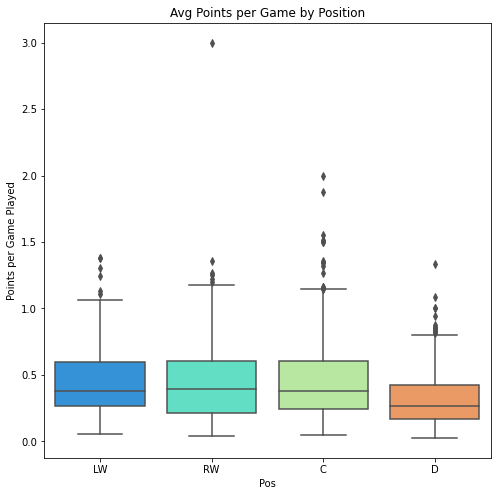

In [190]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["Pos"],y=df["Points per Game Played"],data=df, palette='rainbow')
plt.title("Avg Points per Game by Position")

Text(0.5, 1.0, 'Avg Points per Game by Position')

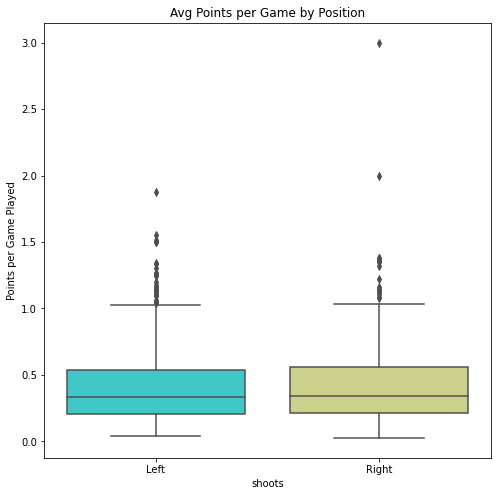

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["shoots"],y=df["Points per Game Played"],data=df, palette='rainbow')
plt.title("Avg Points per Game by Position")

Text(0.5, 1.0, 'Avg Points per Game by Position')

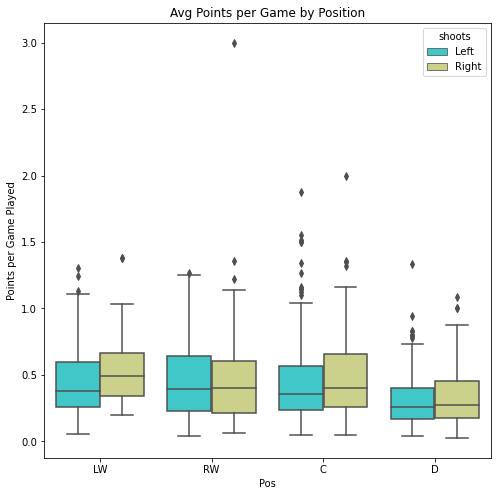

In [191]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df["Pos"],y=df["Points per Game Played"],hue = df["shoots"],data=df, palette='rainbow')
plt.title("Avg Points per Game by Position")

In [192]:
X3 = X2.copy()
X3["Shooting Hand"] = df["shoots"]
X3 = pd.get_dummies(X3, drop_first = True)
X3.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_D,Position_LW,Position_RW,Shooting Hand_Right
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,1,0,0,0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,1,0,0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,1,0,0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,1,0,0,1
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,0,0,0,0


In [193]:
split_and_validate(X3, y)


CrossValidation R^2 score was: [0.47470833 0.58037951 0.61095831 0.54161452 0.65959917] 0.5734519645438432


In [194]:
X3.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_D,Position_LW,Position_RW,Shooting Hand_Right
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,1,0,0,0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,1,0,0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,1,0,0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,1,0,0,1
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,0,0,0,0


In [195]:
X4 = X3.copy()
X4.drop(["Penalties (min) per Game Played", "Age"],axis = 1, inplace = True)

In [196]:
X4.head()

,height,Blocks per Game Played,Hits per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_D,Position_LW,Position_RW,Shooting Hand_Right
911,71.0,0.722222,0.500000,1.333333,48.0,1,0,0,0
1153,69.0,0.327273,0.527273,2.854545,52.0,0,1,0,0
247,78.0,0.500000,2.500000,1.500000,24.0,0,1,0,0
228,71.0,0.833333,1.333333,0.333333,46.0,1,0,0,1
751,72.0,0.714286,1.285714,0.714286,44.0,0,0,0,0


In [197]:
split_and_validate(X4, y)


CrossValidation R^2 score was: [0.46228839 0.57774633 0.62271641 0.53088342 0.67699319] 0.5741255475257236


In [198]:
std = std = StandardScaler()
std.fit(X3.values)
X3_tr = std.transform(X3.values)

In [199]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X3_tr, y)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [200]:
lasso_model.alpha_

0.01

In [201]:
list(zip(X3.columns, lasso_model.coef_))

[('Age', -0.0),
 ('height', -0.0),
 ('Blocks per Game Played', -0.0032249841914771776),
 ('Hits per Game Played', -0.02132885446015116),
 ('Penalties (min) per Game Played', 3.0610644043237754e-05),
 ('Shots on Goal per Game Played', 0.1771588148658281),
 ('Avg Shift Length', 0.018593045045057648),
 ('Position_D', -0.02083920075895997),
 ('Position_LW', -0.0),
 ('Position_RW', 0.0),
 ('Shooting Hand_Right', -0.0)]

In [202]:
train_set_pred = lasso_model.predict(X3_tr)

In [203]:
r2_score(y, train_set_pred)

0.5895078260275861

In [218]:
std.fit(X3.values)
X3_tr = std.transform(X3.values)

lasso_model = Lasso(alpha = 0)
lasso_model.fit(X3_tr, y)

train_set_pred = lasso_model.predict(X3_tr)

r2_score(y, train_set_pred)

/var/folders/yf/3xfmp_p177gg9wwkjm62j1540000gn/T/ipykernel_19851/4235398378.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X3_tr, y)
/Users/paultroy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/paultroy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.726065197341764, tolerance: 0.008835575611352104
  model = cd_fast.enet_coordinate_descent(


0.5987569802567925

In [219]:
list(zip(X3.columns, lasso_model.coef_))

[('Age', -0.0014292031890066831),
 ('height', -0.0005958043281149581),
 ('Blocks per Game Played', -0.006938737960700675),
 ('Hits per Game Played', -0.032704566922966714),
 ('Penalties (min) per Game Played', 0.015680774873951746),
 ('Shots on Goal per Game Played', 0.18357587811994514),
 ('Avg Shift Length', 0.02772785669691051),
 ('Position_D', -0.03138027545748895),
 ('Position_LW', -0.010446719358497749),
 ('Position_RW', -0.001277700497490766),
 ('Shooting Hand_Right', -0.0077553602489060635)]

In [205]:
X5 = X3.copy()
X5["Age*Avg Shift"] = X3["Age"]*X3["Avg Shift Length"]

In [206]:
X5.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_D,Position_LW,Position_RW,Shooting Hand_Right,Age*Avg Shift
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,1,0,0,0,1056.0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,1,0,0,1196.0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,1,0,0,504.0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,1,0,0,1,1104.0
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,0,0,0,0,1056.0


In [207]:
split_and_validate(X5, y)


CrossValidation R^2 score was: [0.47681819 0.57606991 0.61090956 0.54166831 0.66163489] 0.5734201718132622


In [208]:
df[(df["Pos"]=="LW")&(df["shoots"]=="Right")].shape

(25, 25)

In [209]:
df[(df["Pos"]=="LW")&(df["shoots"]=="Left")].shape

(234, 25)

In [210]:
df[(df["Pos"]=="RW")&(df["shoots"]=="Right")].shape

(145, 25)

In [211]:
df[(df["Pos"]=="RW")&(df["shoots"]=="Left")].shape

(102, 25)

In [212]:
df[(df["Pos"]=="C")&(df["shoots"]=="Right")].shape

(203, 25)

In [130]:
df[(df["Pos"]=="C")&(df["shoots"]=="Left")].shape

(336, 25)

In [239]:
X5[["R","W", "Q"]] = X5.loc[:,"Position_D":"Position_RW"].multiply(X5.loc[:,"Shooting Hand_Right"], axis = "index")

In [245]:
del X6

In [262]:
X6 = X.copy()
X6["Position"] = df["Pos"]

In [263]:
X6 = pd.get_dummies(X6)

In [264]:
X6["Shoots"] = df["shoots"]

In [265]:
X6 = pd.get_dummies(X6)

In [266]:
X6.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_C,Position_D,Position_LW,Position_RW,Shoots_Left,Shoots_Right
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,0,1,0,0,1,0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,0,1,0,1,0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,0,1,0,1,0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,0,1,0,0,0,1
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,1,0,0,0,1,0


In [267]:
X6[["C-L", "D-L","LW-L","RW-L"]] = X6.loc[:,"Position_C":"Position_RW"].multiply(X6.loc[:,"Shoots_Left"], axis = "index")

In [268]:
X6.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_C,Position_D,Position_LW,Position_RW,Shoots_Left,Shoots_Right,C-L,D-L,LW-L,RW-L
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,0,1,0,0,1,0,0,1,0,0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,0,1,0,1,0,0,0,1,0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,0,1,0,1,0,0,0,1,0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,0,1,0,0,0,1,0,0,0,0
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,1,0,0,0,1,0,1,0,0,0


In [269]:
X6[["C-R", "D-R","LW-R","RW-R"]] = X6.loc[:,"Position_C":"Position_RW"].multiply(X6.loc[:,"Shoots_Right"], axis = "index")

In [270]:
X6.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_C,Position_D,Position_LW,...,Shoots_Left,Shoots_Right,C-L,D-L,LW-L,RW-L,C-R,D-R,LW-R,RW-R
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


In [271]:
X6.drop(["Position_C","Position_D","Position_LW","Position_RW","Shoots_Left","Shoots_Right"],axis=1,inplace = True)

In [272]:
X6.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,C-L,D-L,LW-L,RW-L,C-R,D-R,LW-R,RW-R
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,0,1,0,0,0,0,0,0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,0,1,0,0,0,0,0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,0,1,0,0,0,0,0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,0,0,0,0,0,1,0,0
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,1,0,0,0,0,0,0,0


In [273]:
X6.drop(["RW-R"],axis=1,inplace = True)

In [279]:
X6.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,C-L,D-L,LW-L,RW-L,C-R,D-R,LW-R
911,22.0,71.0,0.722222,0.500000,0.222222,1.333333,48.0,0,1,0,0,0,0,0
1153,23.0,69.0,0.327273,0.527273,0.290909,2.854545,52.0,0,0,1,0,0,0,0
247,21.0,78.0,0.500000,2.500000,0.000000,1.500000,24.0,0,0,1,0,0,0,0
228,24.0,71.0,0.833333,1.333333,0.333333,0.333333,46.0,0,0,0,0,0,1,0
751,24.0,72.0,0.714286,1.285714,0.000000,0.714286,44.0,1,0,0,0,0,0,0


In [275]:
split_and_validate(X6, y)


CrossValidation R^2 score was: [0.47429123 0.57876827 0.61006557 0.54184727 0.65655072] 0.5723046123197296


In [282]:
std.fit(X6.values)
X6_tr = std.transform(X6.values)

lasso_model = Lasso(alpha = 0)
lasso_model.fit(X6_tr, y)

train_set_pred = lasso_model.predict(X6_tr)

r2_score(y, train_set_pred)

/var/folders/yf/3xfmp_p177gg9wwkjm62j1540000gn/T/ipykernel_19851/3004890365.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X6_tr, y)
/Users/paultroy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/paultroy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.725090199717837, tolerance: 0.008835575611352104
  model = cd_fast.enet_coordinate_descent(


0.5987790500724293

In [278]:
list(zip(X6.columns, lasso_model.coef_))

[('Age', -0.0014292031890066831),
 ('height', -0.0005958043281149581),
 ('Blocks per Game Played', -0.006938737960700675),
 ('Hits per Game Played', -0.032704566922966714),
 ('Penalties (min) per Game Played', 0.015680774873951746),
 ('Shots on Goal per Game Played', 0.18357587811994514),
 ('Avg Shift Length', 0.02772785669691051),
 ('C-L', -0.03138027545748895),
 ('D-L', -0.010446719358497749),
 ('LW-L', -0.001277700497490766),
 ('RW-L', -0.0077553602489060635)]

In [280]:
X7 = X6.copy()
X7.drop("Hits per Game Played",axis = 1, inplace = True)
X7.head()

,Age,height,Blocks per Game Played,Penalties (min) per Game Played,Shots on Goal per Game Played,Avg Shift Length,C-L,D-L,LW-L,RW-L,C-R,D-R,LW-R
911,22.0,71.0,0.722222,0.222222,1.333333,48.0,0,1,0,0,0,0,0
1153,23.0,69.0,0.327273,0.290909,2.854545,52.0,0,0,1,0,0,0,0
247,21.0,78.0,0.500000,0.000000,1.500000,24.0,0,0,1,0,0,0,0
228,24.0,71.0,0.833333,0.333333,0.333333,46.0,0,0,0,0,0,1,0
751,24.0,72.0,0.714286,0.000000,0.714286,44.0,1,0,0,0,0,0,0


In [286]:
std.fit(X7.values)
X7_tr = std.transform(X7.values)

lasso_model = Lasso(alpha = 0)
lasso_model.fit(X7_tr, y)

train_set_pred = lasso_model.predict(X7_tr)

r2_score(y, train_set_pred)

/var/folders/yf/3xfmp_p177gg9wwkjm62j1540000gn/T/ipykernel_19851/1090498011.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X7_tr, y)
/Users/paultroy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/paultroy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.24090304000136, tolerance: 0.008835575611352104
  model = cd_fast.enet_coordinate_descent(


0.5871032326051253

In [288]:
list(zip(X7.columns, lasso_model.coef_))

[('Age', -0.0022424909602567203),
 ('height', -0.005061726278184247),
 ('Blocks per Game Played', -0.014306708117869707),
 ('Penalties (min) per Game Played', 0.005768652778950077),
 ('Shots on Goal per Game Played', 0.18968016092334913),
 ('Avg Shift Length', 0.027939364944313677),
 ('C-L', 0.015146360434575068),
 ('D-L', -0.006603135608528543),
 ('LW-L', -0.0022663797767154877),
 ('RW-L', 0.008351230574453415),
 ('C-R', 0.006621731347135289),
 ('D-R', -0.01447216213059891),
 ('LW-R', -0.001281926291331766)]

In [297]:
X8 = X3.copy()
X8.drop(["Penalties (min) per Game Played"],axis =1 , inplace = True)
X8.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Shots on Goal per Game Played,Avg Shift Length,Position_D,Position_LW,Position_RW,Shooting Hand_Right
911,22.0,71.0,0.722222,0.500000,1.333333,48.0,1,0,0,0
1153,23.0,69.0,0.327273,0.527273,2.854545,52.0,0,1,0,0
247,21.0,78.0,0.500000,2.500000,1.500000,24.0,0,1,0,0
228,24.0,71.0,0.833333,1.333333,0.333333,46.0,1,0,0,1
751,24.0,72.0,0.714286,1.285714,0.714286,44.0,0,0,0,0


In [317]:
std.fit(X8.values)
X8_tr = std.transform(X8.values)

lasso_model = Lasso(alpha = 0)
lasso_model.fit(X8_tr, y)

train_set_pred = lasso_model.predict(X8_tr)

r2_score(y, train_set_pred)

/var/folders/yf/3xfmp_p177gg9wwkjm62j1540000gn/T/ipykernel_19851/3738047478.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X8_tr, y)
/Users/paultroy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/paultroy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.859447237106355, tolerance: 0.008835575611352104
  model = cd_fast.enet_coordinate_descent(


0.5957377759484004

In [313]:
X_test["Shooting Hand"] = df["shoots"]
X_test = pd.get_dummies(X_test, drop_first = True)
X_test["Position"] = df["Pos"]
X_test = pd.get_dummies(X_test, drop_first = True)
X_test

,Age,height,Blocks per Game Played,Hits per Game Played,Shots on Goal per Game Played,Avg Shift Length,Shooting Hand_Right,Position_D,Position_LW,Position_RW
1323,24.0,72.0,0.545455,1.318182,1.681818,36.0,1,0,0,1
203,24.0,73.0,0.446429,2.535714,1.125000,33.0,0,0,1,0
1532,23.0,73.0,0.611111,0.888889,0.944444,45.0,0,0,0,1
1546,34.0,77.0,0.600000,1.260000,2.260000,50.0,1,0,0,1
1443,28.0,71.0,1.225000,1.900000,0.650000,39.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
245,21.0,75.0,2.000000,0.500000,2.000000,30.0,1,0,0,0
738,24.0,74.0,0.153846,0.557692,1.096154,40.0,0,0,0,0
896,20.0,69.0,0.000000,0.300000,3.000000,47.0,1,0,0,1
1170,26.0,74.0,1.722222,0.555556,0.944444,48.0,0,1,0,0


In [314]:
X_test.head()

,Age,height,Blocks per Game Played,Hits per Game Played,Shots on Goal per Game Played,Avg Shift Length,Shooting Hand_Right,Position_D,Position_LW,Position_RW
1323,24.0,72.0,0.545455,1.318182,1.681818,36.0,1,0,0,1
203,24.0,73.0,0.446429,2.535714,1.125000,33.0,0,0,1,0
1532,23.0,73.0,0.611111,0.888889,0.944444,45.0,0,0,0,1
1546,34.0,77.0,0.600000,1.260000,2.260000,50.0,1,0,0,1
1443,28.0,71.0,1.225000,1.900000,0.650000,39.0,0,1,0,0


In [319]:
lr = LinearRegression()
lr.fit(X8, y)
lr.score(X_test, y_test)

0.4206571983219697

In [322]:
test_coefs = list(zip(X_test.columns, lr.coef_))
test_coefs

[('Age', -0.00019918708244365819),
 ('height', 0.00023711160182303924),
 ('Blocks per Game Played', -0.01656629337082315),
 ('Hits per Game Played', -0.033741675646793395),
 ('Shots on Goal per Game Played', 0.25439126802187517),
 ('Avg Shift Length', 0.003600345174322594),
 ('Shooting Hand_Right', -0.0631979362918331),
 ('Position_D', -0.02743803357018183),
 ('Position_LW', -0.004561706569001024),
 ('Position_RW', -0.016240487460130952)]

In [362]:
df_test_coef = pd.DataFrame(test_coefs, columns = ["Feature","Beta"])
df_test_coef["Coeff_Sign"] = ["-","+","-","-","+","+","-","-","-","-"]
df_test_coef

,Feature,Beta,Coeff_Sign
0,Age,-0.000199,-
1,height,0.000237,+
2,Blocks per Game Played,-0.016566,-
3,Hits per Game Played,-0.033742,-
4,Shots on Goal per Game Played,0.254391,+
5,Avg Shift Length,0.003600,+
6,Shooting Hand_Right,-0.063198,-
7,Position_D,-0.027438,-
8,Position_LW,-0.004562,-
9,Position_RW,-0.016240,-


In [363]:
df_test_coef_abs = df_test_coef
df_test_coef_abs["Beta"] = df_test_coef["Beta"].abs()

In [364]:
df_test_coef_abs

,Feature,Beta,Coeff_Sign
0,Age,0.000199,-
1,height,0.000237,+
2,Blocks per Game Played,0.016566,-
3,Hits per Game Played,0.033742,-
4,Shots on Goal per Game Played,0.254391,+
5,Avg Shift Length,0.003600,+
6,Shooting Hand_Right,0.063198,-
7,Position_D,0.027438,-
8,Position_LW,0.004562,-
9,Position_RW,0.016240,-


In [365]:
df_coef_subset = df_test_coef.iloc[[2,3,4,5]]
df_coef_subset

,Feature,Beta,Coeff_Sign
2,Blocks per Game Played,0.016566,-
3,Hits per Game Played,0.033742,-
4,Shots on Goal per Game Played,0.254391,+
5,Avg Shift Length,0.003600,+


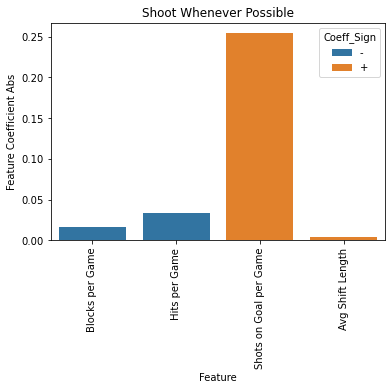

In [378]:
ax = sns.barplot(x="Feature",y="Beta",hue = "Coeff_Sign",data = df_coef_subset,dodge = False)
ax.set_xticklabels(["Blocks per Game","Hits per Game","Shots on Goal per Game", "Avg Shift Length"],rotation = 90)
ax.set_title('Shoot Whenever Possible')
ax.set_ylabel('Feature Coefficient Abs');
plt.savefig("correlation_coeff.png", bbox_inches='tight')